# CENSUS INCOME PROJECT

## Content

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing Dataset

In [1]:
import pandas as pd
census_income=pd.read_csv('census_income.csv')

# Putting data in data frame

In [2]:
ci=pd.DataFrame(data=census_income)
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# About the columns

1. Age :

Age of person

2. Workclass :

Workclass of person

3. Fnlwgt :

Final weight

4. Education :

Education Degree of person

5. Education_num :

Number of years of education

6. Marital_status :

Marital status of person

7. Occupation :

Occupation of person

8. Relationship :

Relationship of person

9. Race :

Race of person

10. Sex :

Sex of person

11. Capital_gain :

Capital gain of person

12. Capital_loss :

Capital loss of person

13. Hours_per_week :

Number of hours per week

14. Native_country :

Native country of person

15. Income :

Income category of person

In [3]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Checking null values
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**No null values are present in our dataset**

In [5]:
# Checking whether "?" is present in our dataset or not
ci.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

**" ?" is present in variables "Workclass", "Occupation", "Native Country"**

## Exploratory Data Analysis

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Checking Rows and columns
ci.shape

(32560, 15)

In [8]:
# Checking all the unique elements in variable Workclass
ci['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
# Counting the frequency of unique elements
list_=ci['Workclass']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

Unique Values : [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Frequency Values : [1836, 960, 2093, 7, 22696, 1116, 2541, 1297, 14]


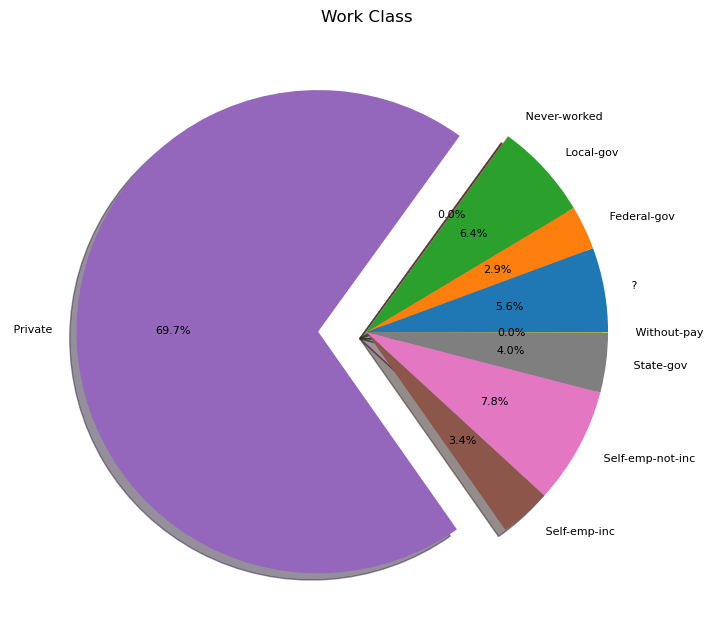

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
# Creating pie plot for Work class

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=1, textprops={'fontsize':8})
plt.title('Work Class')
plt.show()

ci['Workclass'].value_counts()

**Majority of people are from private workclass and almost 0% people never worked & without pay**

In [11]:
# Counting the frequency of unique elements
list_=ci['Education']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

Unique Values : [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Frequency Values : [933, 1175, 433, 168, 333, 646, 514, 1067, 1382, 5354, 413, 10501, 1723, 51, 576, 7291]


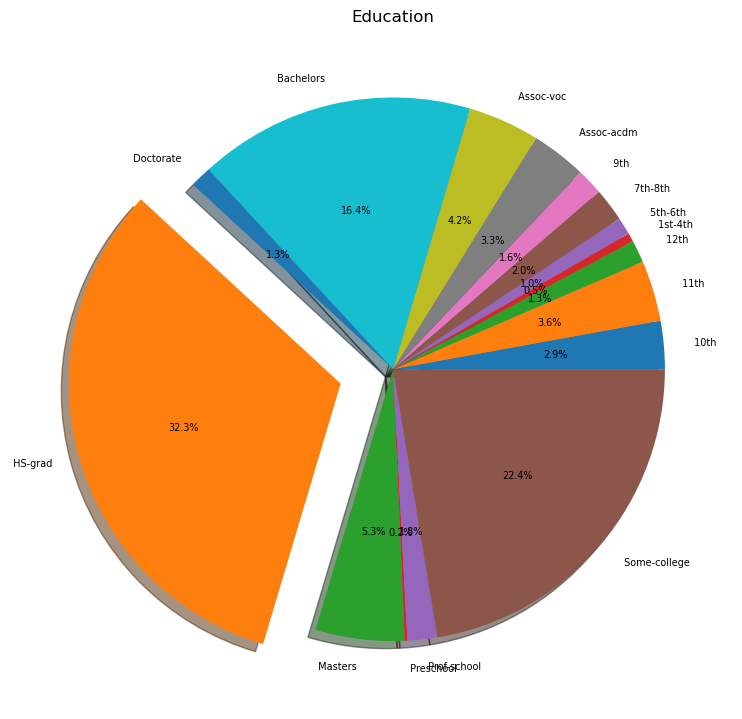

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [12]:
# Creating pie plot for Education

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(9,9),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=1, textprops={'fontsize':7})
plt.title('Education')
plt.show()

ci['Education'].value_counts()

**We can see in the above plot that most people have education of HS_grad and after that Some college & Bachelors, While least number of people has the education of pre-school & 1st-4th**

Unique Values : [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Frequency Values : [4443, 23, 14976, 418, 10682, 1025, 993]


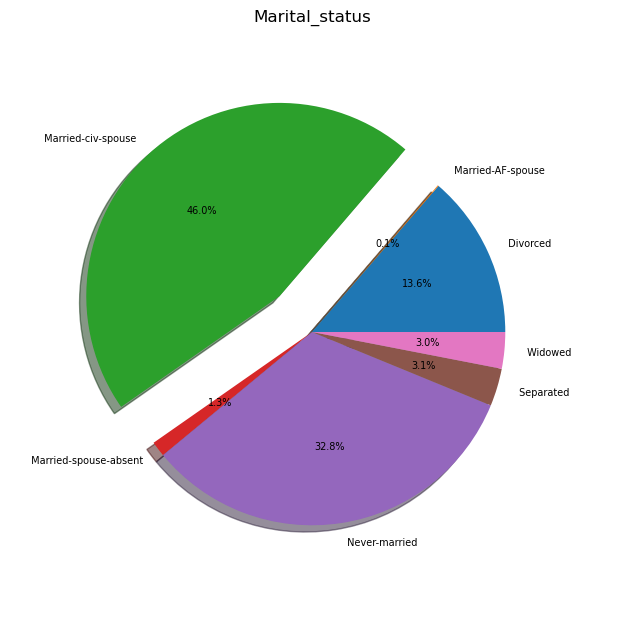

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [13]:
# Counting the frequency of unique elements
list_=ci['Marital_status']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Marital status

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Marital_status')
plt.show()

ci['Marital_status'].value_counts()

**Most number of people are married with civilian spouse and very least are married with Armed forces spouse**

**13.6% people are divorced and 32.8% people never married**

Unique Values : [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
Frequency Values : [1843, 3769, 9, 4099, 4066, 994, 1370, 2002, 3295, 149, 4140, 649, 3650, 928, 1597]


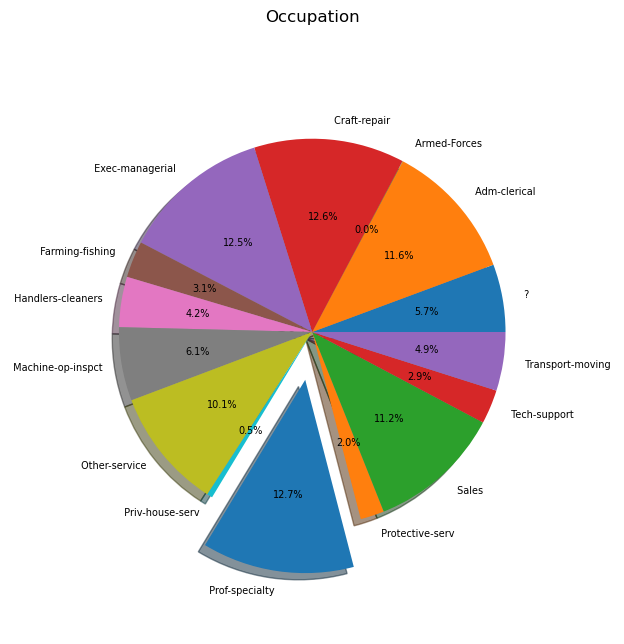

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
# Counting the frequency of unique elements
list_=ci['Occupation']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Occupation

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Occupation')
plt.show()

ci['Occupation'].value_counts()

**Most people are in prof-speciality, craft-repair, exec-managerial and sales, while least are in Armed forces and priv-house-serv**

Unique Values : [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
Frequency Values : [13193, 8304, 981, 5068, 3446, 1568]


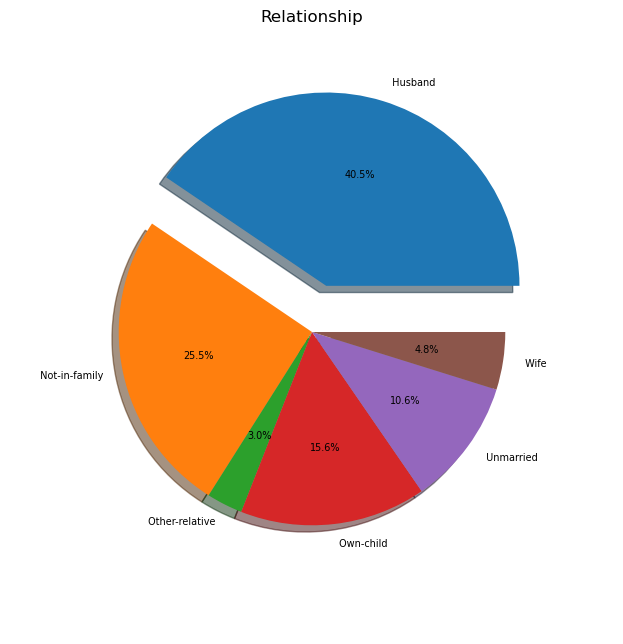

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [15]:
# Counting the frequency of unique elements
list_=ci['Relationship']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Relationship

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Relationship')
plt.show()

ci['Relationship'].value_counts()

**Highest percentage is of Husbands and lowest percentage is of other-relative**

Unique Values : [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
Frequency Values : [311, 1039, 3124, 271, 27815]


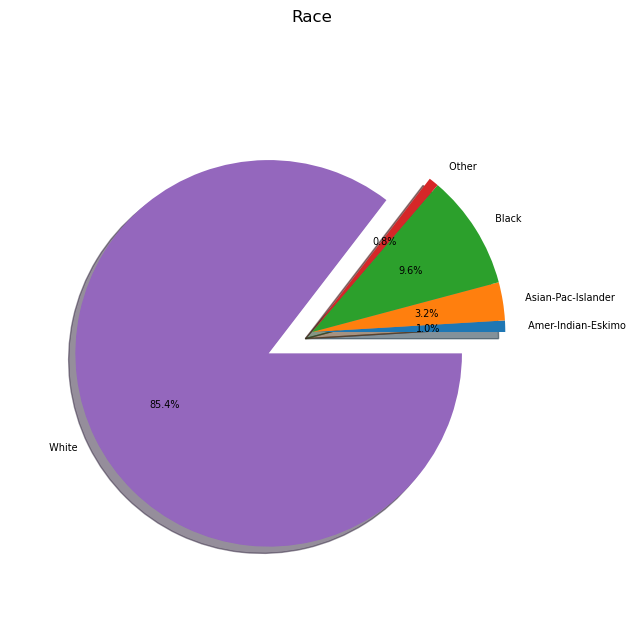

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [16]:
# Counting the frequency of unique elements
list_=ci['Race']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Race

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Race')
plt.show()

ci['Race'].value_counts()

**Most people are white and after that black, while Amer-Indian-Eskimo and other are least.**

Unique Values : [' Female' ' Male']
Frequency Values : [10771, 21789]


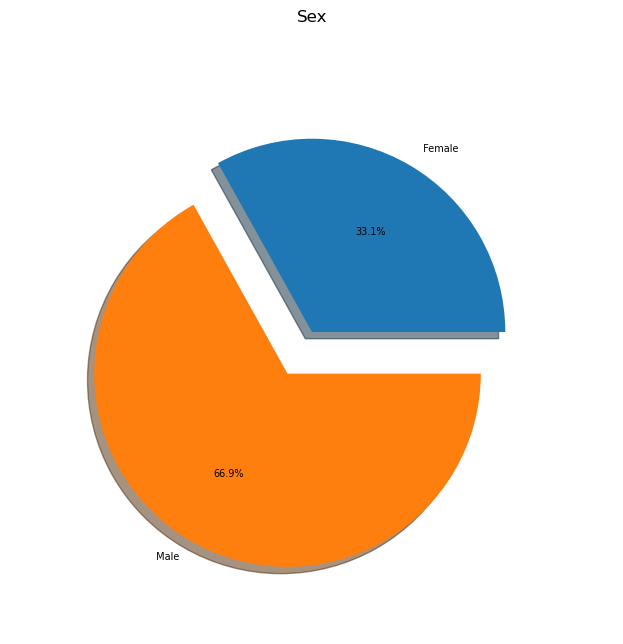

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [17]:
# Counting the frequency of unique elements
list_=ci['Sex']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Sex

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Sex')
plt.show()

ci['Sex'].value_counts()

**Male are more as compared to Female**

Unique Values : [' <=50K' ' >50K']
Frequency Values : [24719, 7841]


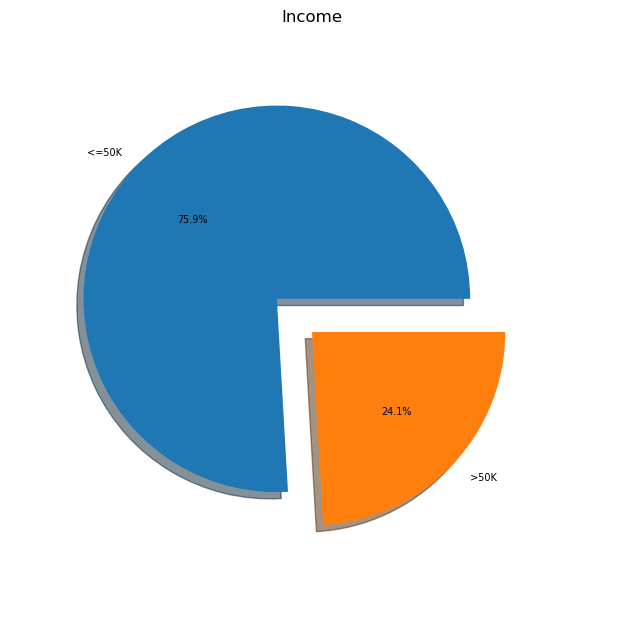

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [18]:
# Counting the frequency of unique elements
list_=ci['Income']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Income

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(8,8),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Income')
plt.show()

ci['Income'].value_counts()

**Most people have the income of more than 50k**

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

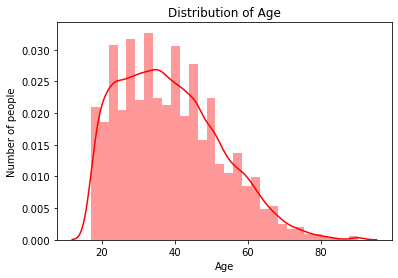

In [19]:
# Checking distribution of Age by applying distplot
plt.title('Distribution of Age')
plt.ylabel('Number of people')
sns.distplot(ci['Age'],bins=30,color='red')
ci['Age'].value_counts()

**We can see in above plot that most people are in the age group of 20-40 and above 80 are the least**

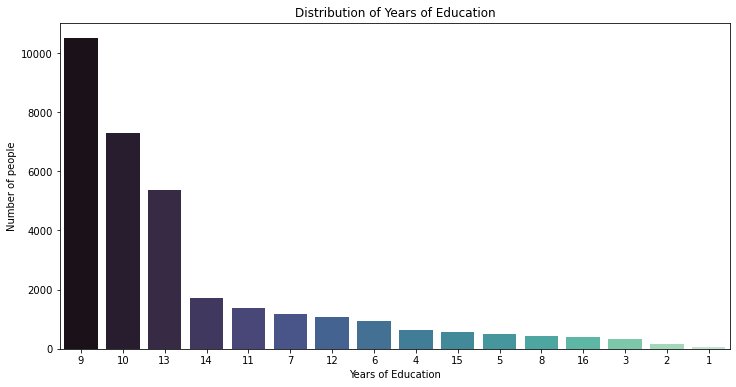

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [20]:
# Checking Distribution of years education with the help of barplot
edu_num = ci['Education_num'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(edu_num.index, edu_num.values, palette='mako', order=ci['Education_num'].value_counts().index)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')

plt.show()

ci['Education_num'].value_counts()

**Most people have done the education for 9 years**

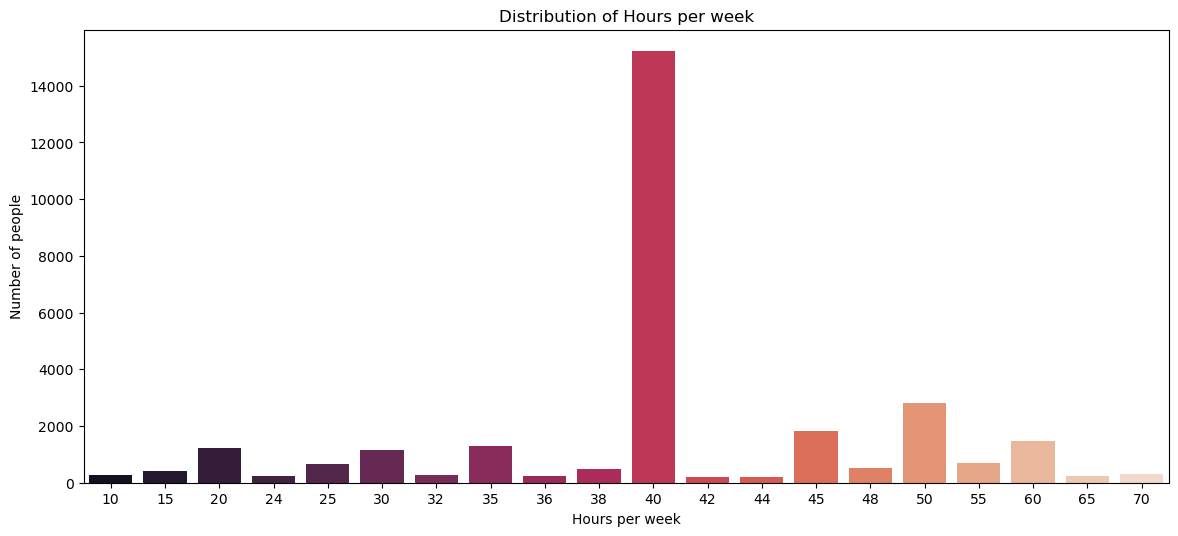

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [21]:
# Checking Distribution of Hours per week by applying barplot
hours_per_week = ci['Hours_per_week'].value_counts().head(20)

plt.figure(figsize=(14,6),dpi=100)
sns.barplot(hours_per_week.index, hours_per_week.values, palette='rocket')
plt.title('Distribution of Hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Number of people')

plt.show()

ci['Hours_per_week'].value_counts()

**Most people work 40 hours per week**

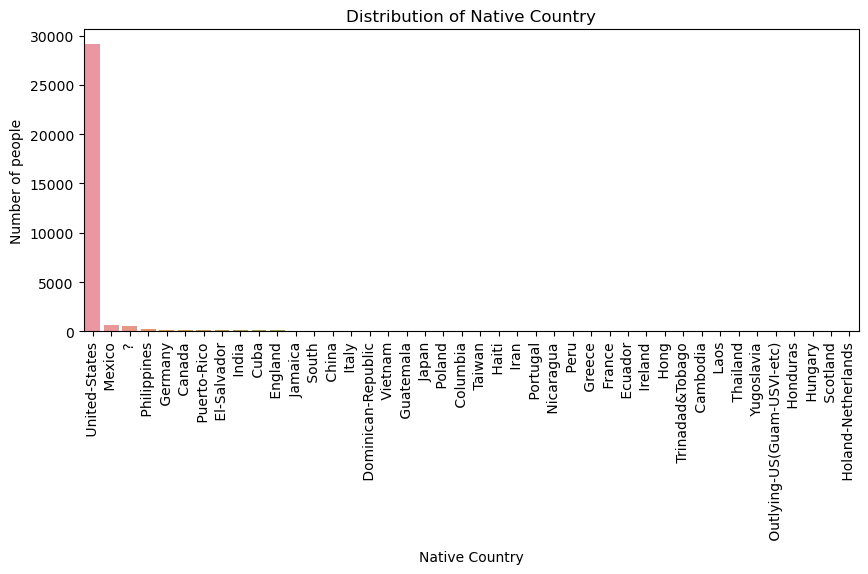

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [22]:
# Checking distribution of the Native Countries with barplot
country = ci['Native_country'].value_counts()

plt.figure(figsize=(10,4),dpi=100)
sns.barplot(country.index, country.values)
plt.title('Distribution of Native Country')
plt.xlabel('Native Country')
plt.ylabel('Number of people')
plt.xticks(rotation=90)
plt.show()

ci['Native_country'].value_counts()

**Majority of people are of United States itself, after that Mexican people are most and people from Holand-Netherlands are least**

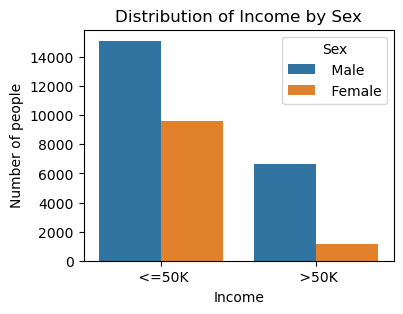

In [23]:
# Counting how many people have income more than 50k with respect to their age
plt.style.use('default')
plt.figure(figsize=(4,3),dpi=100)
sns.countplot(x='Income',hue='Sex',data=ci)
plt.xlabel('Income',fontdict={'fontsize':10})
plt.ylabel('Number of people',fontdict={'fontsize':10})
plt.title('Distribution of Income by Sex')
plt.show()




**More male have the salary above 50k as compared to Female**

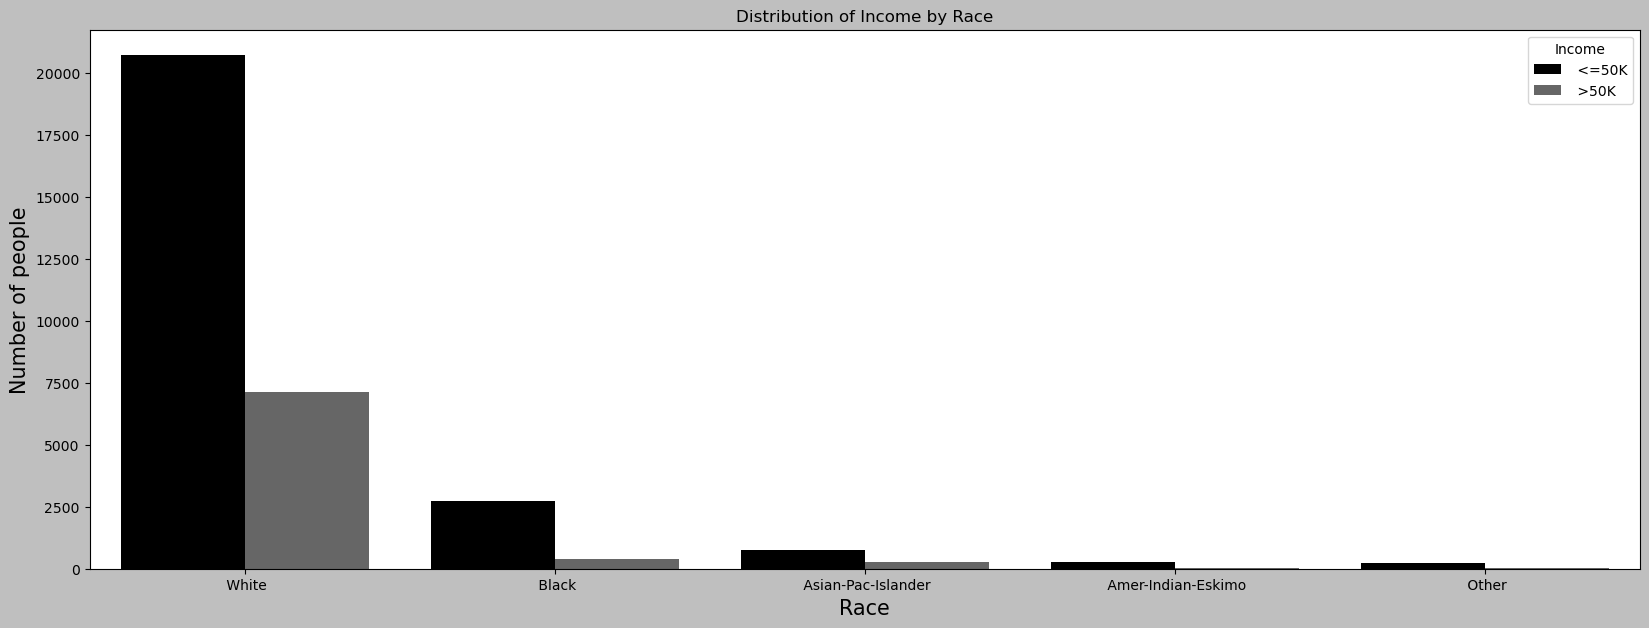

In [24]:
# Category plot of Which Race has the more Income
plt.style.use('grayscale')
plt.figure(figsize=(20,7),dpi=100)
sns.countplot(x='Race',hue='Income',data=ci)
plt.xlabel('Race',fontdict={'fontsize':15})
plt.ylabel('Number of people',fontdict={'fontsize':15})
plt.title('Distribution of Income by Race')
plt.show()

**Most of the White people have income above 50k as compared to other races**

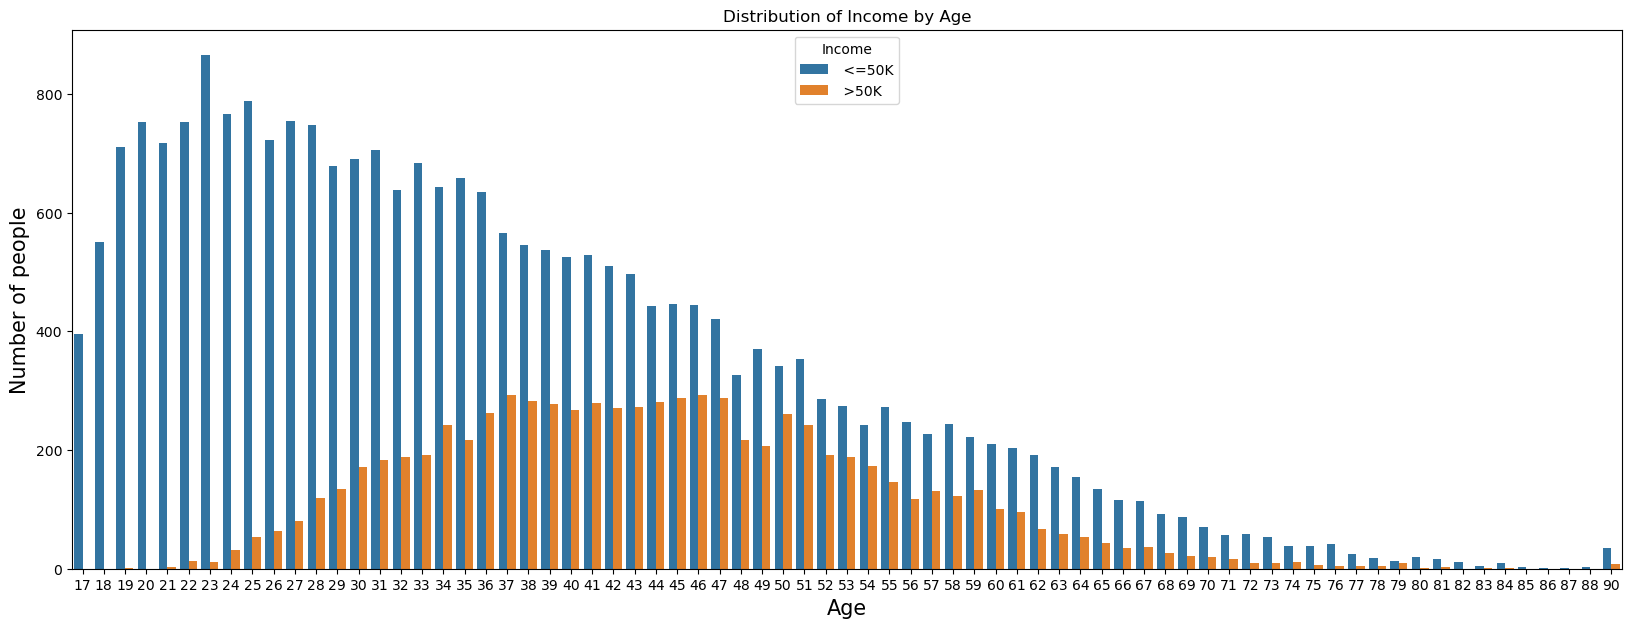

In [25]:
# Category plot showing income by age
plt.style.use('default')
plt.figure(figsize=(20,7),dpi=100)
sns.countplot(x='Age',hue='Income',data=ci)
plt.xlabel('Age',fontdict={'fontsize':15})
plt.ylabel('Number of people',fontdict={'fontsize':15})
plt.title('Distribution of Income by Age')
plt.show()

**Most people of the age of 23 has the income of more than 50k**

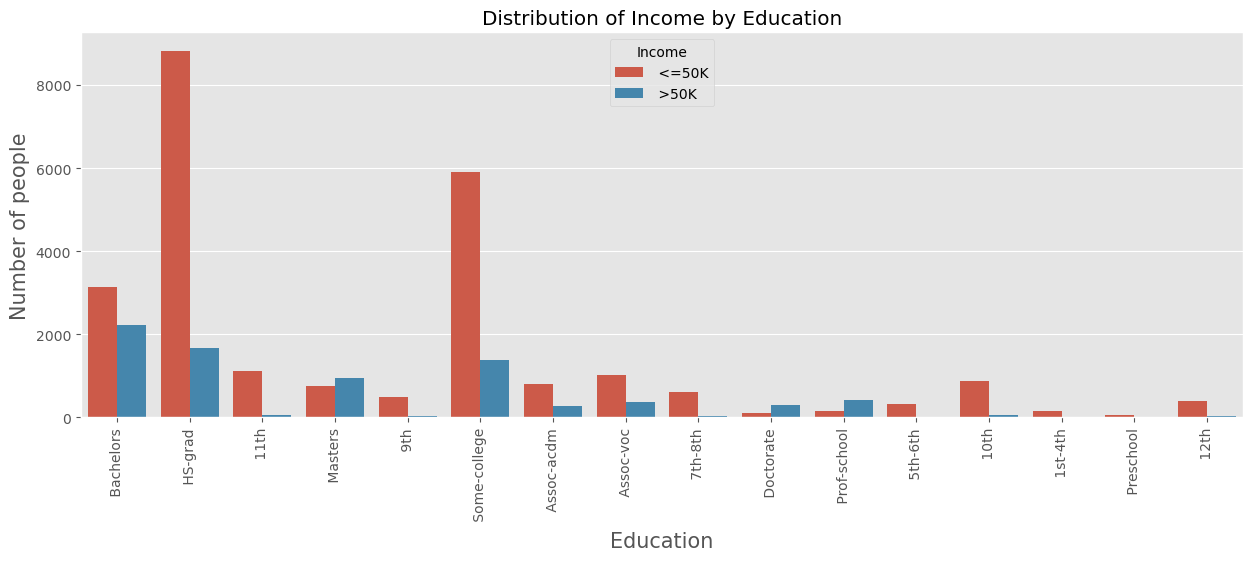

In [26]:
# Category plot showing income by Education
plt.style.use('ggplot')
plt.figure(figsize=(15,5),dpi=100)
sns.countplot(x='Education',hue='Income',data=ci)
plt.xlabel('Education',fontdict={'fontsize':15})
plt.ylabel('Number of people',fontdict={'fontsize':15})
plt.title('Distribution of Income by Education')
plt.xticks(rotation=90)
plt.show()

**Most People with education of HS-grad has income of more than 50k while people with education of pre school are very less whose income is above 50k**

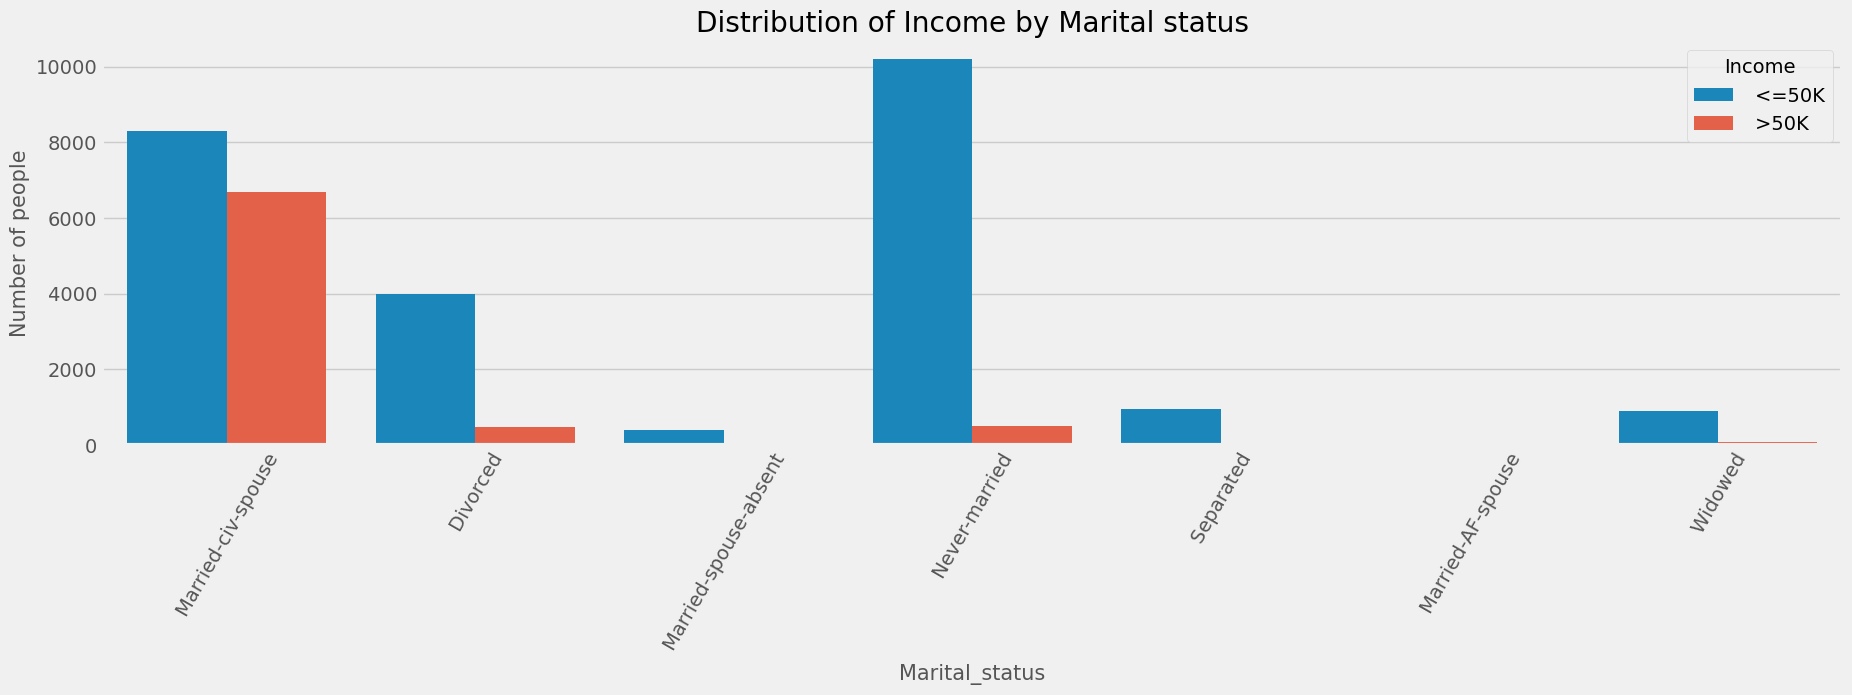

In [27]:
# Category plot showing income by Marital Status
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(x='Marital_status',hue='Income',data=ci)
plt.xlabel('Marital_status',fontdict={'fontsize':15})
plt.ylabel('Number of people',fontdict={'fontsize':15})
plt.title('Distribution of Income by Marital status')
plt.xticks(rotation=60)
plt.show()

**People who are never married have mostly the income above 50k**

In [28]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [29]:
# Checking Correlation
ci.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

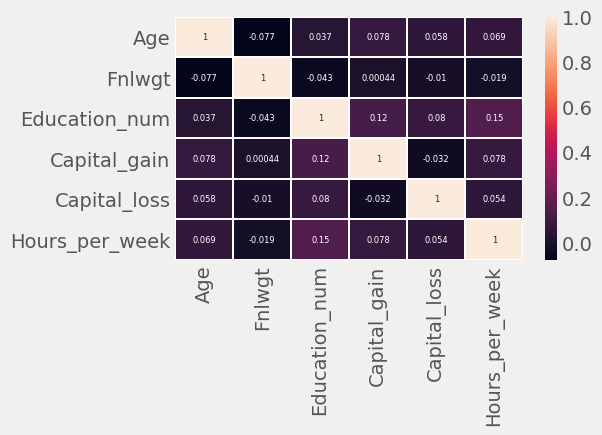

In [30]:
# plotting heatmap to see the correlation
plt.figure(figsize=(5,3),dpi=100)
sns.heatmap(ci.corr(),annot=True,linewidth=0.5,linecolor='White',annot_kws={'fontsize':6})

**Most variables are positively correlated with each other except fnlwgt**

In [31]:
# We have to take care of "?" in variables by converting it into nan
ci=ci.replace(' ?',np.nan)

In [32]:
ci.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [33]:
# Creating Variance Inflation Factor function
ci_=ci.copy()
ci_.drop(columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income'],inplace=True)         # They are not numeric

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

cic_=add_constant(ci_)
def cic_vif():
    vif=pd.DataFrame()
    vif['Variables']=cic_.columns
    vif['VIF Factor']=[variance_inflation_factor(cic_.values,i)
                       for i in range(cic_.shape[1])]
    return (vif)

In [34]:
cic_vif()

,Variables,VIF Factor
0,const,35.588215
1,Age,1.019323
2,Fnlwgt,1.007768
3,Education_num,1.043669
4,Capital_gain,1.026702
5,Capital_loss,1.013467
6,Hours_per_week,1.031913


**We have calculated the Variance Inflation Factor for the above Variables.**

In [35]:
ci.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Outliers

In [36]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:>

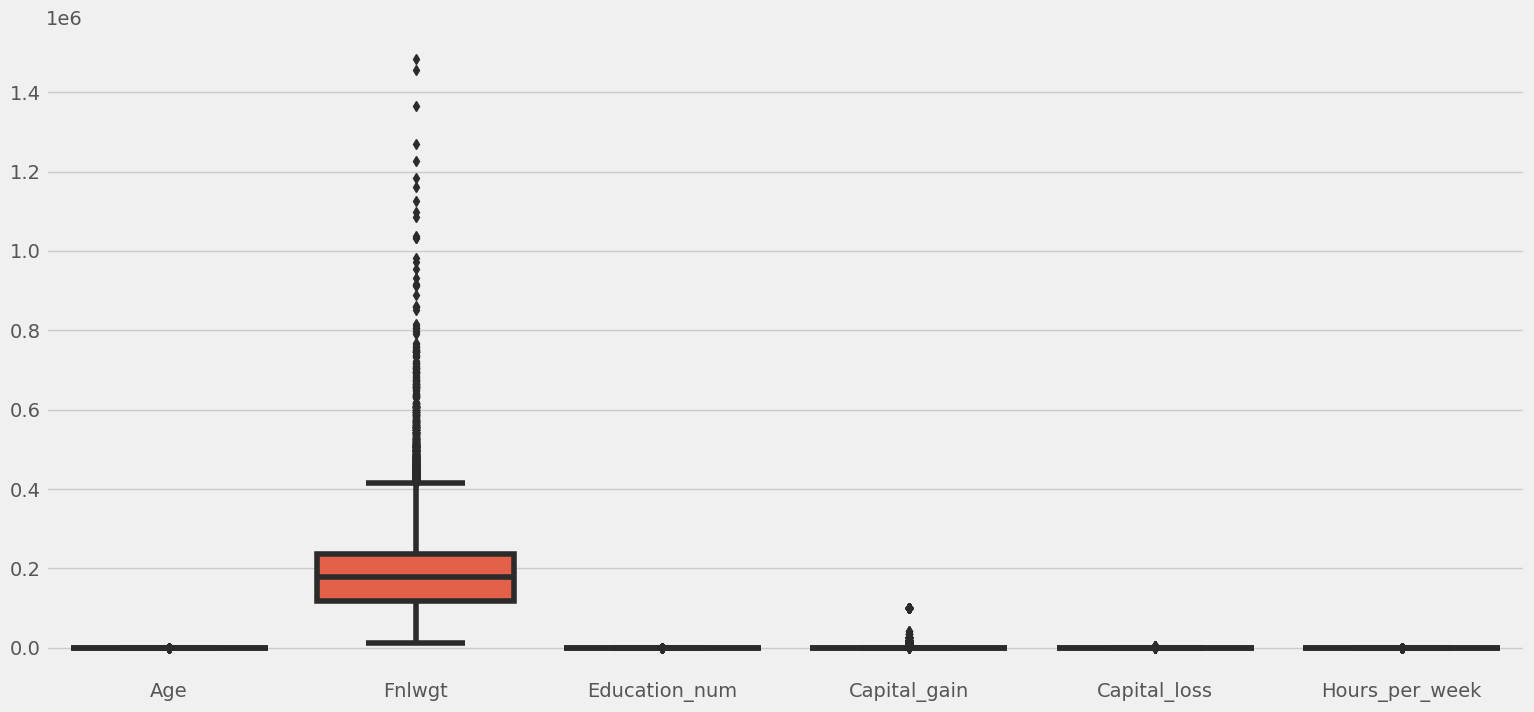

In [37]:
# Checking outliers by plotting dataset into boxplot
plt.figure(figsize=(17,8),dpi=100)
sns.boxplot(data=ci)

**We can see that most of the variables have outliers**

## Removing Outliers

In [38]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [39]:
# Checking presence of skewness in the data
ci.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

**Skewness is present in capital gain**

In [40]:
# Removing Outliers
from numpy import percentile

a=ci.columns
for i in a:
    if isinstance(ci[i][0],str):
        continue
    else:
        # Quartiles
        q=percentile(ci[i],[25,75])
        # Lower & Upper bound
        lower_bound= q[0] - (1.5*(q[1]-q[0]))
        upper_bound= q[1] + (1.5*(q[1]-q[0]))
        ci[i] = ci[i].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

**We have removed the outliers higher than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.**

## Again checking the Outliers

<AxesSubplot:>

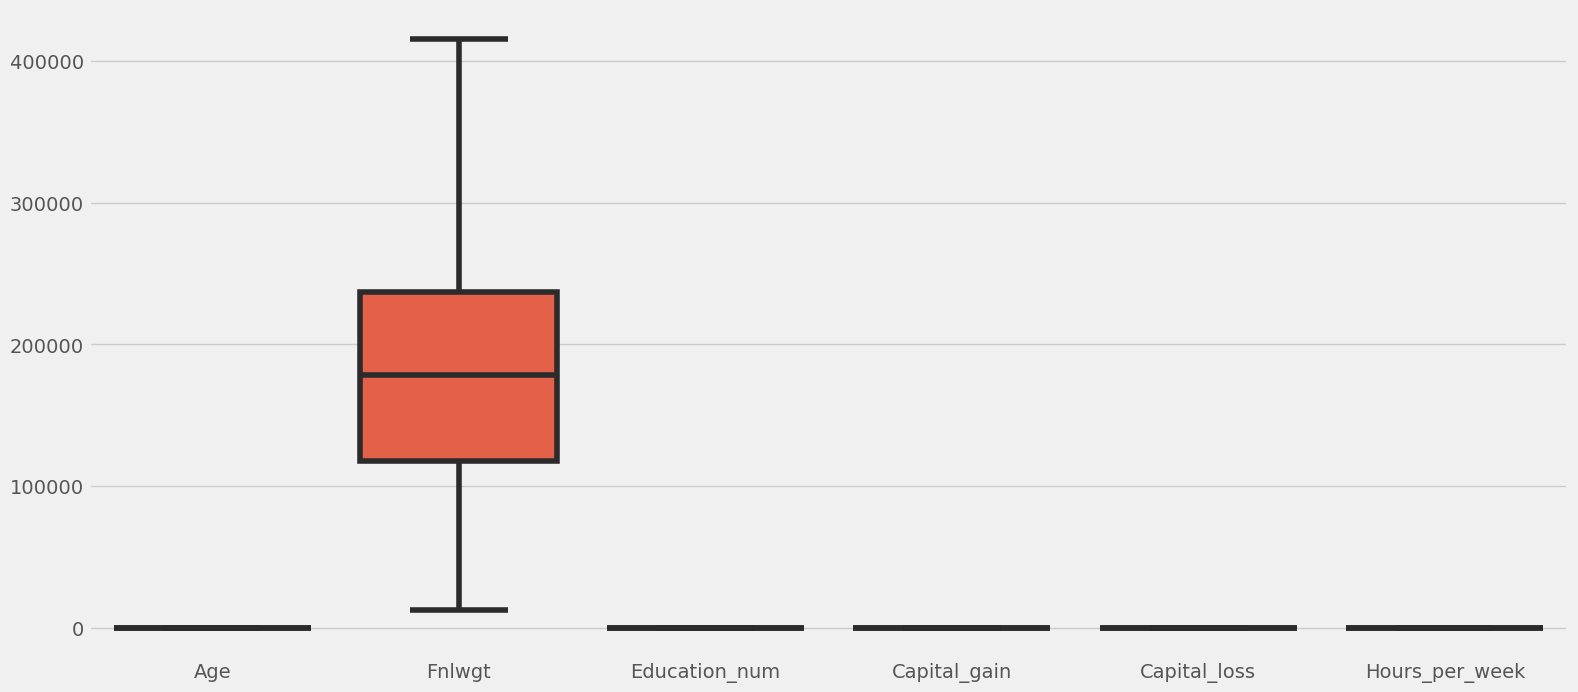

In [41]:
plt.figure(figsize=(17,8),dpi=100)
sns.boxplot(data=ci)

**We can see that there are no outliers present in our data.**

In [42]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
1,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


### Converting nan values into most frequent

In [43]:
# Applying Simple Imputer to convert the nan values into numeric
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

ci['Workclass']=imp.fit_transform(ci['Workclass'].values.reshape(-1,1))
ci['Occupation']=imp.fit_transform(ci['Occupation'].values.reshape(-1,1))
ci['Native_country']=imp.fit_transform(ci['Native_country'].values.reshape(-1,1))

In [44]:
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**No null values are present in the data now**

### Converting Categorical data of "ci" into integer

**Now we will convert the categorical variable like "Workpclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income" into numeric.**

**We will apply label encoder to these variables, it will convert the categorical data into numeric.**

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

d=["Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex" , "Native_country", "Income"]
for i in d:
    ci[i]=le.fit_transform(ci[i].astype(str))

In [46]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,5,83311.0,9,13.0,2,3,0,4,1,0.0,0.0,32.5,38,0
1,38.0,3,215646.0,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
2,53.0,3,234721.0,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
3,28.0,3,338409.0,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
4,37.0,3,284582.0,12,14.0,2,3,5,4,0,0.0,0.0,40.0,38,0


**Now our categorical data in converted into numeric.**

## Model Creation

In [47]:
x=ci.drop(columns=['Income'])
y=ci[['Income']]

print(x.shape)
print(y.shape)

(32560, 14)
(32560, 1)


**We have created two variables containing Input data (x) and Output data (y).**

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

**We've splitted our dataset into training and testing, where we have used our 80% of data for training and 20% of data for testing**

### Scaling x_train and x_test using Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [50]:
# Importing important algorithms and metrics to create the prediction models and to check their accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Making a function to calculate and print following features for the model : Accuracy Score, Confusion Matrix, Classification Report.**

In [51]:
# Creating function for checking accuracy score, confusion matrix and classification report of prediction models
def classifier_func(y_test,pred):
    ac=accuracy_score(y_test,pred)
    cm=confusion_matrix(y_test,pred)
    cr=classification_report(y_test,pred)
    
    print('Accuracy Score :',ac,'\n')
    print('Confusion Matrix :',cm,'\n')
    print('Classification Report :',cm,'\n')

**Making a Cross Validation function**

In [52]:
from sklearn.model_selection import cross_val_score
def cross_val_accuracy(model,x_train=x_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model,X = x_train, y = y_train ,cv=10)
    print('Cross_val_Accuracy: {:.2f} %'.format(accuracies.mean()*100),'\n')
    print('Cross_val_Standard Deviation: {:.2f} %'.format(accuracies.std()*100),'\n')

### Logistic Regression

**Creating Logistic Regression Model, it'll fit the Logistic Regression model on x_train and y_train and predict the x_test and store it in pred. We will print predicted Income and actual Income and outputs of the above functions**

In [53]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('\033[1m' + 'LOGISTIC REGRESSION MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred)
cross_val_accuracy(lr)

print('Predicted Income',pred)
print('\nActual Income\n',y_test)

LOGISTIC REGRESSION MODEL SUMMERY

Accuracy Score : 0.8048218673218673 

Confusion Matrix : [[4573  319]
 [ 952  668]] 

Classification Report : [[4573  319]
 [ 952  668]] 

Cross_val_Accuracy: 80.62 % 

Cross_val_Standard Deviation: 0.58 % 

Predicted Income [0 0 0 ... 1 0 0]

Actual Income
        Income
15892       0
24797       0
22726       0
9696        0
30866       0
...       ...
19176       0
16556       1
15033       1
25770       0
29198       0

[6512 rows x 1 columns]


### Decision Tree Classifier

**Creating Decision Tree Classifier Model, it'll fit the Decision Tree Classifier model on x_train and y_train and predict the x_test and store it in pred_dtc. We will print predicted Income and actual Income and outputs of the above functions**

In [54]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print('\033[1m' + 'DECISION TREE CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_dtc)
cross_val_accuracy(dtc)

print('Predicted Income',pred_dtc)
print('\nActual Income\n',y_test)

DECISION TREE CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.7718058968058968 

Confusion Matrix : [[4170  722]
 [ 764  856]] 

Classification Report : [[4170  722]
 [ 764  856]] 

Cross_val_Accuracy: 77.77 % 

Cross_val_Standard Deviation: 0.56 % 

Predicted Income [0 0 0 ... 1 0 0]

Actual Income
        Income
15892       0
24797       0
22726       0
9696        0
30866       0
...       ...
19176       0
16556       1
15033       1
25770       0
29198       0

[6512 rows x 1 columns]


### KNeighbors Classifier

**Creating KNeighbors Classifier Model, it'll fit the KNeighbors Classifier model on x_train and y_train and predict the x_test and store it in pred_knc. We will print predicted Income and actual Income and outputs of the above functions**

In [55]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)

print('\033[1m' + 'KNEIGHBORS CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_knc)
cross_val_accuracy(knc)

print('Predicted Income',pred_knc)
print('\nActual Income\n',y_test)

KNEIGHBORS CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.8118857493857494 

Confusion Matrix : [[4370  522]
 [ 703  917]] 

Classification Report : [[4370  522]
 [ 703  917]] 

Cross_val_Accuracy: 81.30 % 

Cross_val_Standard Deviation: 0.33 % 

Predicted Income [1 0 0 ... 1 0 0]

Actual Income
        Income
15892       0
24797       0
22726       0
9696        0
30866       0
...       ...
19176       0
16556       1
15033       1
25770       0
29198       0

[6512 rows x 1 columns]


### Random Forest Classifier

**Creating Random Forest Classifier Model, it'll fit the Random Forest Classifier model on x_train and y_train and predict the x_test and store it in pred_rc. We will print predicted Income and actual Income and outputs of the above functions**

In [56]:
rc=RandomForestClassifier(n_estimators=100,random_state=42)
rc.fit(x_train,y_train)
pred_rc=rc.predict(x_test)

print('\033[1m' + 'RANDOM FOREST CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_rc)
cross_val_accuracy(rc)

print('Predicted Income',pred_rc)
print('\nActual Income\n',y_test)

RANDOM FOREST CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.8224815724815725 

Confusion Matrix : [[4455  437]
 [ 719  901]] 

Classification Report : [[4455  437]
 [ 719  901]] 

Cross_val_Accuracy: 82.86 % 

Cross_val_Standard Deviation: 0.41 % 

Predicted Income [1 0 0 ... 1 0 0]

Actual Income
        Income
15892       0
24797       0
22726       0
9696        0
30866       0
...       ...
19176       0
16556       1
15033       1
25770       0
29198       0

[6512 rows x 1 columns]


### Gradient Boosting Classifier

**Creating Gradient Boosting Classifier Model, it'll fit the Gradient Boosting Classifier model on x_train and y_train and predict the x_test and store it in pred_gc. We will print predicted Income and actual Income and outputs of the above functions**

In [57]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
pred_gc=gc.predict(x_test)

print('\033[1m' + 'GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_gc)
cross_val_accuracy(gc)

print('Predicted Income',pred_gc)
print('\nActual Income\n',y_test)

GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.8375307125307125 

Confusion Matrix : [[4537  355]
 [ 703  917]] 

Classification Report : [[4537  355]
 [ 703  917]] 

Cross_val_Accuracy: 84.24 % 

Cross_val_Standard Deviation: 0.47 % 

Predicted Income [0 0 0 ... 1 0 0]

Actual Income
        Income
15892       0
24797       0
22726       0
9696        0
30866       0
...       ...
19176       0
16556       1
15033       1
25770       0
29198       0

[6512 rows x 1 columns]


### The best performing model for "Income" is Gradient Boosting Classifier

### Model Saving

In [58]:
import pickle
filename='census_income_model.pkl'
pickle.dump(gc,open(filename,'wb'))

**Gradient Boosting Classifier Model is saved with the name "census_income_model"**

## Conclusion

In [59]:
# printing the predicted result and the actual result
print('Predicted Result','\n', pred_gc)
print('Actual Result','\n', y_test)

Predicted Result 
 [0 0 0 ... 1 0 0]
Actual Result 
        Income
15892       0
24797       0
22726       0
9696        0
30866       0
...       ...
19176       0
16556       1
15033       1
25770       0
29198       0

[6512 rows x 1 columns]


# THE END